In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_file_name(axe_list, stiffness_list, starting_cord = None):
    path_list = []
    filename_list = []
    if starting_cord == None:
        for axe in axe_list:
            for stif in stiffness_list:
                pathname = "run/vis_cell_a{}_s{}.iter/".format(axe, stif)
                path_list.append(pathname)
        file_name = "0.metadata.csv"
        for path in path_list:
            path_file = path + file_name
            filename_list.append(path_file)
    else:
        for axe in axe_list:
            for stif in stiffness_list:
                for coor in starting_cord:
                    pathname = "vis_cell_a{}_s{}_{}.iter/".format(axe, stif, coor)
                    path_list.append(pathname)
        file_name = "0.metadata.csv"
        for path in path_list:
            path_file = path + file_name
            filename_list.append(path_file)
    return filename_list

In [3]:
def generate_off_center(data):
    Time = np.array(data['time']) * 1000
    X = np.array(data['center_x'])
    Y = np.array(data['center_y'])
    Z = np.array(data['center_z'])
    deformation = np.array(data['taylorDeformation'])
    delta_t = abs(Time[1] - Time[0])
    V_all = np.zeros(len(Time) - 1)
    for t in range(len(Time) - 1):
        Vx = (X[t + 1] - X[t]) / (Time[t + 1] - Time[t]) 
        Vy = (Y[t + 1] - Y[t]) / (Time[t + 1] - Time[t]) 
        Vz = (Z[t + 1] - Z[t]) / (Time[t + 1] - Time[t]) 
        V_all[t] = np.sqrt(Vy**2 + Vz**2)
    dist_off = np.sqrt(Y**2 + Z**2)
    return Time, X, Y, Z, V_all, dist_off, deformation

In [4]:
def find_x_range(result, deterministic_point = 1):
    if deterministic_point == 1:
        x_to_look = (-170, -150)
    elif deterministic_point <= 13:
        left = (-150) + (deterministic_point - 2) * 30 
        right = left + 30
        x_to_look = (left, right)
    else:
        raise ValueError("determinstic point has to be smaller than 8 but more than 0")
    X = list(result['center_x'])
    temp_list = []
    for i,x in enumerate(X):
        if x > x_to_look[0] and x < x_to_look[1]:
            temp_list.append(i)
    if temp_list == []:
        return temp_list
    else:
        range_x_index = (min(temp_list), max(temp_list))
        return range_x_index

In [5]:
def sort_data(file_name, det_point):
    data = pd.read_csv(file_name)
    data_sorted = data.sort_values('center_x')
    data_reindex = data_sorted.reset_index(drop=True)
    range_x = find_x_range(data_reindex, det_point)
    if range_x == []:
        return range_x
    data_cleaned = data_reindex.iloc[range_x[0]: range_x[1]]
    Time, X, Y, Z, V_all, dist_off, deformation = generate_off_center(data_cleaned)
    result = [Time, X, Y, Z, V_all, dist_off, deformation]
    return result

In [6]:
def gene_plot(filename_list, x_axis, y_axis, if_axes=0, det_point=1):
    color = iter(['--r','--b', '--c', '--g', '--y'])
    func_axis = ['time', 'x', 'y', 'z', 'velocity', 'distance', 'deformation']
    label_list = ['Time (s)', 'X position (um)', 'Y position (um)', 'Z position (um)', 
                  'Velocity (um/ms)', 'Distance from center (um)', 'Deformation']
    for index, options in enumerate(func_axis):
        if x_axis == options:
            x_input = index
        if y_axis == options:
            y_input = index
    for i, file in enumerate(filename_list):
        c = next(color)
        try: 
            pd.read_csv(file)
        except:
            continue
        result = sort_data(file, det_point) 
        if result == []:
            continue
        length_y = len(result[y_input])
        x_to_be_plot = result[x_input][0:length_y]
        y_to_be_plot = result[y_input][0:length_y]
        if if_axes == 1:
            plot_label = "Radius (µm): {}".format(axe_list[i])
            plot_type = "cell size"
        elif if_axes == 0:
            plot_label = "Gs: {}".format(stiffness_list[i] * 10 **(-5))
            plot_type = "stiffness"
        plt.plot(x_to_be_plot, y_to_be_plot, c, label = plot_label)
        plt.legend()
        plt.title("{} vs {} with change of {}".format(y_axis, x_axis, plot_type))
        plt.ylabel(label_list[y_input])
        plt.xlabel(label_list[x_input])
    plt.show()


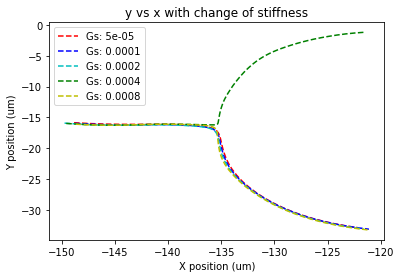

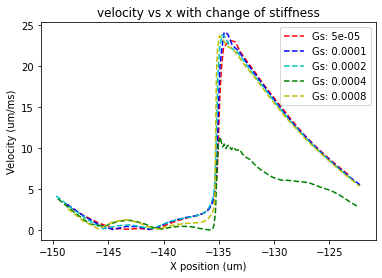

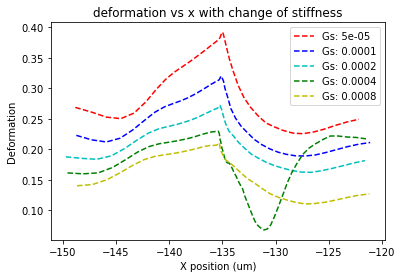

In [8]:
axe_list = ['3']
stiffness_list = [5, 10, 20, 40, 80]
filename_list = create_file_name(axe_list, stiffness_list)
for point in [2]:
    for y in ['y', 'velocity', 'deformation']:
        for x in ['x']:
            gene_plot(filename_list, x, y, if_axes = 0, det_point=point)

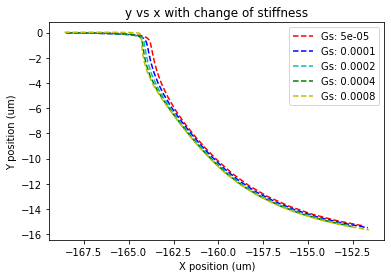

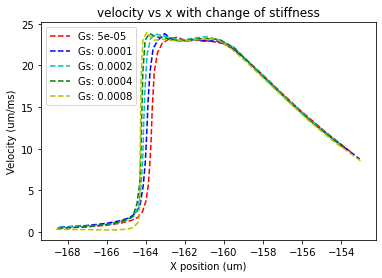

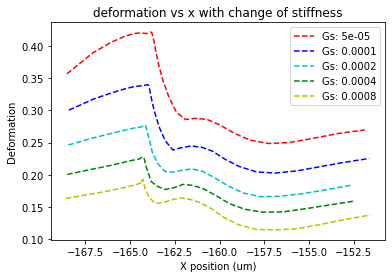

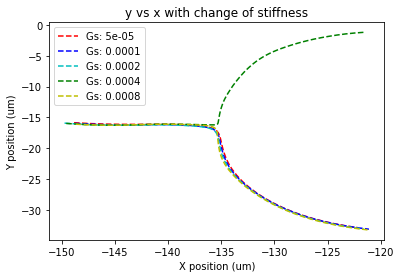

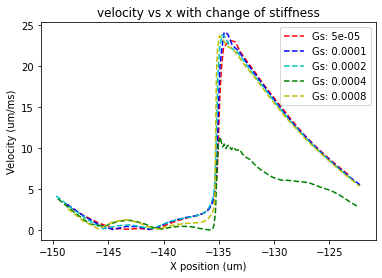

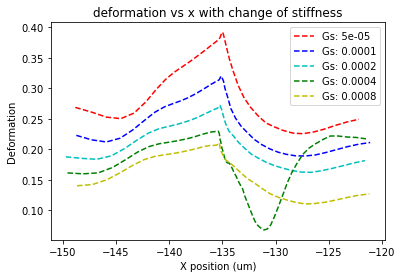

In [10]:
axe_list = ['3']
stiffness_list = [5, 10, 20, 40, 80]
filename_list = create_file_name(axe_list, stiffness_list)
for point in [1,2]:
    for y in ['y', 'velocity', 'deformation']:
        for x in ['x']:
            gene_plot(filename_list, x, y, if_axes = 0, det_point=point)